##### 

# EIemenary Insights 

## Baseball Analytics 1 - What is up with Jose Berrios? 

### Author: Craig Adams
#### Contact: craig.adams@elementaryinsights.com
#### Date:  September 2022


### Table of Contents

[Introduction](#Introduction) <br>
[Methodology](#Methodology) <br>
[Results and Discussion](#Results-and-Discussion) <br>
[Summary and Conclusions](#Summary-and-Conclusions) <br>

###  Introduction

Thirty years past the first World Series win, the Toronto Blue Jays are on the cusp of another extended run at playing October baseball.  The team has the generational talent of Vladimir Guerrero Jr., a strong supporting cast of young players like Alex Manoah,  Bo Bichette and Alejandro Kirk, and a group of talented veteran players like George Springer and Kevin Gausman signed as free agents for several more years.  

The Jays have also made several strategic trades to bring in additional talent to augment the core.  One of the moves was at the 2021 trade deadline where the Jays [sent two top prospects](https://jaysjournal.com/2021/07/30/blue-jays-pay-huge-price-acquire-jose-berrios-minnesota-twins/) to the Minnesota Twins to fend off the competition for their young ace, José Berríos.  They then [signed him](https://www.sportsnet.ca/mlb/article/blue-jays-jose-berrios-agree-seven-year-131m-contract-extension/) to a 7 year, $131 M deal in the off season, a move that was [widely endorsed](https://www.thestar.com/sports/bluejays/opinion/2021/11/18/blue-jays-trade-and-subsequent-signing-of-jos-berros-is-gm-ross-atkins-best-work-to-date.html) at the time.  In fact, at the start of the 2022 season, the Jays starting pitching was heralded as being [one of the best the team has ever had](https://www.thestar.com/sports/bluejays/opinion/2022/04/05/we-may-not-have-seen-a-blue-jays-starting-rotation-like-this-before.html).  Things were looking up as José Berríos began the season as the de facto ace starting the Jays April home opener.  

To say that José Berríos did not have the season everyone thought he would have is an understatement. As of mid-August, he had the [worst Earned Run Average (ERA) out of all qualified starting pitchers](https://www.mlb.com/news/home-runs-bite-jose-berrios-in-loss).

>*When Berríos walked off the mound Friday, he owned a 5.61 ERA. Of the 58 qualified starters in Major League Baseball, that ranks him dead last, and it’s not particularly close. Only one other qualified starter, Germán Márquez (5.08), has an ERA over five. For the five seasons prior to this, Berríos’ ERA landed between 3.52 and 4.00 each season, with the 4.00 coming in the shortened ‘20 campaign.*

Much has been written about his year, even more about [the origin of his struggles](https://www.google.com/search?q=Jose+Berrios+struggles&rlz=1C1CHZN_enCA998CA998&biw=1920&bih=961&sxsrf=ALiCzsYHO7ezmtQ65k6Uzy8lfbltMj0fQw%3A1662400327632&ei=RzcWY8uGJvedptQPjb6vgAs&ved=0ahUKEwiLxoLom_75AhX3jokEHQ3fC7AQ4dUDCA4&uact=5&oq=Jose+Berrios+struggles&gs_lcp=Cgdnd3Mtd2l6EAM6BAgAEB5KBAhBGABKBAhGGABQAFgAYPC8AWgBcAB4AIABeogB6wGSAQMwLjKYAQCgAQHAAQE&sclient=gws-wiz), with the Jays themselves [actively trying to figure it out](https://www.si.com/mlb/bluejays/news/blue-jays-jose-berrios-inconsistency-guardians). Is it pitch selection, is it control, is it arm health?  Or is it something else?  

In the following article, we will take a look at the data and try to figure out why exactly José Berríos had such a poor year in 2022.  

###  Methodology

There are several websites that gather and publish different cuts of MLB baseball data:  [Baseball Reference](https://www.baseball-reference.com/) has seasonal data and basic metrics for player performance, [Fangraphs](https://www.fangraphs.com/) publishes both basic and advanced seasonal metrics while [Baseball Savant](https://baseballsavant.mlb.com/statcast_search) has MLB's [Statcast](https://en.wikipedia.org/wiki/Statcast) pitch-by-pitch data for each game going back many years. 

To facilitate extraction of data from these sites, there is an excellent [pybaseball package](https://github.com/jldbc/pybaseball) originally developed by James LeDoux et al. that is documented in detail [here](https://github.com/jldbc/pybaseball/tree/master/docs).  It can be installed over top of a basic Python environment.

To start our investigate of José Berríos and his 2022 struggles, we'll find and load his basic seasonal stats from Baseball Reference to see what can be seen before digging deeper into the advanced metrics from Fangraphs.  With the knowledge of those metrics and any patterns we might see in them, we can then take a closer look at his pitch-by-pitch data from StatCast.

In [3]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pybaseball
from pybaseball import statcast
from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher
from pybaseball import pitching_stats, pitching_stats_bref

import warnings

# Set environment
pybaseball.cache.enable()
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [4]:
# Print package details
import session_info
session_info.show()

### Results and Discussion

#### Comparing the Traditional Seasonal Statistics 

Jose Berrios' MLB profile can be found by using the lookup function available in the pybaseball package.

In [5]:
# Find the ID and date ranges for the player
playerid_lookup('berrios', 'jose', fuzzy=True)

No identically matched names found! Returning the 5 most similar names.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,barrios,jose,110624,barrj102,barrijo01,1000604,1982.0,1982.0
1,berríos,josé,621244,berrj001,berrijo01,14168,2016.0,2022.0
2,alberro,jose,110106,albej001,alberjo01,1000105,1995.0,1997.0
3,rijo,jose,121206,rijoj001,rijojo01,349,1984.0,2002.0
4,berry,joe,110935,berrj103,berryjo02,1000906,1921.0,1922.0
5,berry,joe,110934,berrj102,berryjo03,1000907,1942.0,1946.0
6,berry,joe,110936,berrj101,berryjo01,1000905,1902.0,1902.0


Berríos has been playing in the major leagues for seven seasons since 2016.  His seasonal basic statistics can be pulled for each year from Baseball Reference using the pybaseball pitching_stats function and a custom wrapper function to save the data into a dataframe.  

Note that a recent update of the BR database has introduced an error to José Berríos spelling (accent characters are not consistent).   So, we'll have to leverage the fact there is only one pitcher in baseball history with the stem "Berr" to pull all of his seasonal statistics for now (see Table below).


In [6]:
# Build a wrapper function that can compile the data for a player from the Baseball Reference database => typo in the database for the accents above his name for 2018-2020

def player_pitching_stats_bref(start_year, end_year, player_name):
    """
    A wrapper function to pull all of a pitcher's data from the years indicated into a single dataframe for analysis
    """
    player_df = pd.DataFrame()
    # Set the date range
    years = np.arange(start_year, end_year+1)
    # Pull each dataset
    for year in years:
        year_stats= pitching_stats_bref(year)
#         player_year = year_stats.loc[year_stats['Name']==player_name]
        player_year = year_stats.loc[year_stats['Name'].str.contains(player_name)]
        player_year['Season'] = str(year)
        player_df = pd.concat([player_df, player_year], axis=0)
    
    player_df = player_df.sort_values(by='Season', ascending=True).set_index('Season').dropna(axis=1)
    
    return player_df

In [7]:
# Pull Jose Berrios data
berrios_stats_bref = player_pitching_stats_bref(2016, 2022, 'Berr')
berrios_stats_bref

,Name,Age,#days,Lev,Tm,G,GS,W,L,IP,H,R,ER,BB,SO,HR,HBP,ERA,AB,2B,3B,IBB,GDP,SF,SB,CS,PO,BF,Pit,Str,StL,StS,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016,José Berríos,22,2279,Maj-AL,Minnesota,14,14,3.0,7.0,58.1,74,56,52,35,49,12,5,8.02,239,15,0,0,5,0,4,1,1,281,1142,0.58,0.15,0.08,0.38,0.27,0.09,1.869,0.348,7.6,1.40
2017,José Berríos,23,1917,Maj-AL,Minnesota,26,25,14.0,8.0,145.2,131,71,63,48,139,15,13,3.89,548,28,2,0,13,4,6,3,1,616,2382,0.63,0.17,0.09,0.40,0.26,0.09,1.229,0.292,8.6,2.90
2018,JosÃ© BerrÃ­os,24,1553,Maj-AL,Minnesota,32,32,12.0,11.0,192.1,159,83,82,61,202,25,13,3.84,717,31,1,1,11,4,8,2,1,797,3096,0.65,0.17,0.12,0.42,0.24,0.09,1.144,0.271,9.5,3.31
2019,JosÃ© BerrÃ­os,25,1189,Maj-AL,Minnesota,32,32,14.0,8.0,200.1,194,94,82,51,195,26,9,3.68,774,35,3,0,13,6,12,1,1,842,3132,0.67,0.18,0.11,0.42,0.24,0.08,1.223,0.301,8.8,3.82
2020,JosÃ© BerrÃ­os,26,825,Maj-AL,Minnesota,12,12,5.0,4.0,63.0,57,28,28,26,68,8,3,4.00,240,9,1,0,3,2,3,0,1,271,1096,0.64,0.18,0.12,0.41,0.30,0.07,1.318,0.295,9.7,2.62
2021,José Berríos,27,456,Maj-AL,"Minnesota,Toronto",32,32,12.0,9.0,192.0,159,83,75,45,204,22,15,3.52,714,40,3,0,11,5,2,5,5,781,3043,0.66,0.19,0.10,0.44,0.27,0.06,1.063,0.278,9.6,4.53
2022,José Berríos,28,87,Maj-AL,Toronto,32,32,12.0,7.0,172.0,199,103,100,45,149,29,11,5.23,692,34,1,0,11,3,6,5,2,753,2721,0.67,0.18,0.09,0.41,0.26,0.07,1.419,0.329,7.8,3.31


His first year in 2016 wasn't a full season as he was called up from the minor leagues part way through the year.  He struggled mightly as well yet had to pitch through it for a Minnesota team that [lost 103 games](https://www.washingtonpost.com/news/sports/wp/2017/05/24/jose-berrios-looked-ruined-in-2016-now-he-looks-like-the-twins-future-ace/).  In fairness, we will drop that season in order to better represent his "good" years.

Since a pitcher's innings pitched are not consistent from season to season, year-over-year comparisons need to utilize "rate" stats like Hits per 9 innings (H/9) rather than "counting" stats like Hits.  We will need to calculate some key rate stats from the seasonal data.


In [8]:
# Drop 2016 
berrios_stats_bref.drop(['2016'], axis=0, inplace=True)

# Add new rate stats, scaled per 9
berrios_stats_bref['H/9'] = round(berrios_stats_bref['H']/berrios_stats_bref['IP']*9,2)
berrios_stats_bref['HR/9'] = round(berrios_stats_bref['HR']/berrios_stats_bref['IP']*9,2)
berrios_stats_bref['BB/9'] = round(berrios_stats_bref['BB']/berrios_stats_bref['IP']*9,2)

# Build list of key rate stats and filter
key_rate_stats= ['ERA','WHIP','SO9','H/9','HR/9','BB/9']
berrios_rate_stats = berrios_stats_bref[key_rate_stats]
berrios_rate_stats

,ERA,WHIP,SO9,H/9,HR/9,BB/9
Season,,,,,,
2017,3.89,1.229,8.6,8.12,0.93,2.98
2018,3.84,1.144,9.5,7.45,1.17,2.86
2019,3.68,1.223,8.8,8.73,1.17,2.29
2020,4.00,1.318,9.7,8.14,1.14,3.71
2021,3.52,1.063,9.6,7.45,1.03,2.11
2022,5.23,1.419,7.8,10.41,1.52,2.35


Looking at the key rates stats in the Table above, there is the clear and alarming jump in ERA of over one additional run per game as mentioned in the Introduction.  There are clear changes in the other rate stats as well for 2022 relative to the previous seasons.  These can be quantified by averaging the preceeding season metrics and comparing the differences to 2022. 


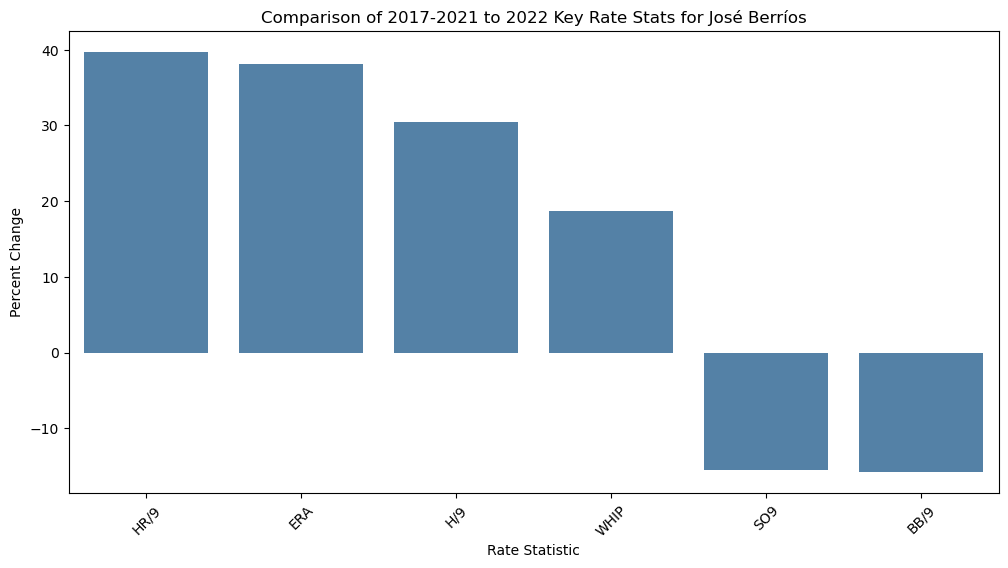

In [9]:
# Calculate differences between 2022 and previous full seasons
berrios_previous = berrios_rate_stats[berrios_rate_stats.index!='2022'].mean()
berrios_current = berrios_rate_stats[berrios_rate_stats.index=='2022'].mean()
berrios_difference = round((berrios_current-berrios_previous)/berrios_previous*100,2).sort_values(ascending=False)

# Plot the differences sorted highest to lowest
fig, ax = plt.subplots(figsize=(12,6))
ax=sns.barplot(x=berrios_difference.index, y = berrios_difference, color='steelblue')
plt.title('Comparison of 2017-2021 to 2022 Key Rate Stats for José Berríos')
plt.xlabel('Rate Statistic')
plt.ylabel('Percent Change')
plt.xticks(rotation=45)
plt.show()

The graph shows that the largest increase between 2018-2021 and 2022 is homeruns per 9 innings at almost 40%. Hits per 9 (H/9) have also increased by 30% while strikeouts and walks per 9 are both down over 10%.  The WHIP, or Walks and Hits per inning statistic has gone up 20% in response to these changes.  

Basically, it appears that the opposition are hitting the ball more often and striking out or walking less than before and when hitting the ball, the probabilty of the ball leaving the ballpark has almost doubled, giving rise to a proportionally elevated ERA.


#### Looking at the Advanced Metrics for Clues

Fangraphs calculates more [detailed summary stats](https://library.fangraphs.com/pitching/xfip/) (over 300 in fact) that might provide more insight into what is going on.

In [10]:
# Load all Fangraphs seasonal pitching data using pybaseball function
fg_stats = pitching_stats(2017, 2022)
print(f"Features in the dataset: {fg_stats.shape[1]}")

# Extract Berrios data
berrios_fg = fg_stats.loc[fg_stats['Name'].str.contains('Jose Berrios')].sort_values(by='Season').set_index('Season')
berrios_fg

Features in the dataset: 334


,IDfg,Name,Team,Age,W,L,WAR,ERA,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,Dollars,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB% 2,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,K/9+,BB/9+,K/BB+,H/9+,HR/9+,AVG+,WHIP+,BABIP+,LOB%+,K%+,BB%+,LD%+,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018,14168,Jose Berrios,MIN,24,12,11,3.1,3.84,32,32,2,1,0,0,192.1,797,159,83,82,25,61,1,13,2,0,202,211,195,102,18,1096,1972,3068,98,12,13,5,9.45,2.85,3.31,7.44,1.17,0.220,1.14,0.270,0.758,3.90,1.08,0.201,0.415,0.384,0.092,0.128,0.057,0.385,29.8,192.1,NaN,NaN,29.8,$24.6,4.15,3.89,1.75,-12.86,14.62,20.14,2.00,0.98,0.94,0.87,1.22,30,1.96,-0.17,0.605,93.2,NaN,NaN,NaN,NaN,0.305,81.8,0.090,83.8,NaN,NaN,NaN,NaN,0.002,NaN,14.4,NaN,NaN,4.1,-3.9,NaN,NaN,0.78,NaN,NaN,0.44,-1.41,NaN,NaN,0.328,0.667,0.473,0.612,0.861,0.762,0.428,0.645,0.112,0,0,0,89,92,92,0.253,0.077,3.80,4.59,-0.07,0.344,0.260,NaN,NaN,NaN,NaN,NaN,0.305,NaN,NaN,0.091,NaN,NaN,NaN,93.4,92.8,NaN,NaN,NaN,NaN,NaN,81.7,NaN,NaN,83.7,NaN,NaN,-6.8,-10.2,NaN,NaN,NaN,NaN,NaN,7.4,NaN,NaN,-9.1,NaN,NaN,8.8,5.9,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,2.2,NaN,NaN,8.5,6.4,NaN,NaN,NaN,NaN,NaN,2.1,NaN,NaN,-4.7,NaN,NaN,0.82,0.82,NaN,NaN,NaN,NaN,NaN,0.23,NaN,NaN,-1.72,NaN,NaN,0.289,0.652,0.473,0.553,0.851,0.761,0.507,21.1,4.0,0.9,0.0,0.9,24 - 24,0.177,0.415,0.319,0.267,0.198,0.461,0.342,3.68,0.361,0.089,NaN,0.295,0.335,NaN,NaN,NaN,NaN,0.250,0.001,NaN,83.9,NaN,81.8,93.6,NaN,NaN,NaN,NaN,93.0,89.7,NaN,-8.3,N

The 2017 seasonal data for Berrios is not available for some reason.  However, there is sufficient 'good' season data in the years 2018 through 2021 for comparison purposes.

As before, we can isolate some key rate statistics to augment what we've learned so far.

In [11]:
# Filter key rate stats
fg_key_rate_stats = ['ERA','H/9','HR/9','K/9', 'BB/9','FIP','xFIP', 'BABIP','GB/FB','GB%','FB%','SwStr%','Contact%','Swing%','CSW%','O-Swing%','Z-Swing%',
                 'Zone%','Barrel%','HardHit%']
berrios_fg_rate_stats = berrios_fg[fg_key_rate_stats]
berrios_fg_rate_stats

,ERA,H/9,HR/9,K/9,BB/9,FIP,xFIP,BABIP,GB/FB,GB%,FB%,SwStr%,Contact%,Swing%,CSW%,O-Swing%,Z-Swing%,Zone%,Barrel%,HardHit%
Season,,,,,,,,,,,,,,,,,,,,
2018,3.84,7.44,1.17,9.45,2.85,3.90,3.89,0.270,1.08,0.415,0.384,0.112,0.762,0.473,0.276,0.328,0.667,0.428,0.060,0.328
2019,3.68,8.72,1.17,8.76,2.29,3.85,4.32,0.299,1.12,0.421,0.374,0.108,0.779,0.489,0.292,0.364,0.651,0.434,0.065,0.320
2020,4.00,8.14,1.14,9.71,3.71,4.06,4.28,0.295,1.13,0.404,0.357,0.116,0.747,0.458,0.291,0.344,0.633,0.396,0.063,0.397
2021,3.52,7.45,1.03,9.56,2.11,3.47,3.59,0.277,1.26,0.428,0.340,0.099,0.789,0.468,0.290,0.340,0.647,0.417,0.091,0.383
2022,5.23,10.41,1.52,7.80,2.35,4.55,4.21,0.328,1.01,0.403,0.397,0.093,0.808,0.484,0.277,0.341,0.675,0.429,0.095,0.434


The noted ERA, H/9 and HR/9 jumps are the same as before.  There are also significant differences in some of the advanced metrics like Fielding Independent Pitching (FIP) and Swinging Strike Percent(SwStr%). As before, we can sort through the differences by examining the tabular seasonal data and by averaging the previous 4 seasons and visualizing the differences compared to 2022. 

In [12]:
# Calculate the differences
berrios_previous_fg = berrios_fg_rate_stats.loc[berrios_fg_rate_stats.index!=2022].mean()
berrios_current_fg = berrios_fg_rate_stats[berrios_fg_rate_stats.index==2022].mean()
berrios_difference_fg = round((berrios_current_fg-berrios_previous_fg)/berrios_previous_fg*100,2).sort_values(ascending=False)

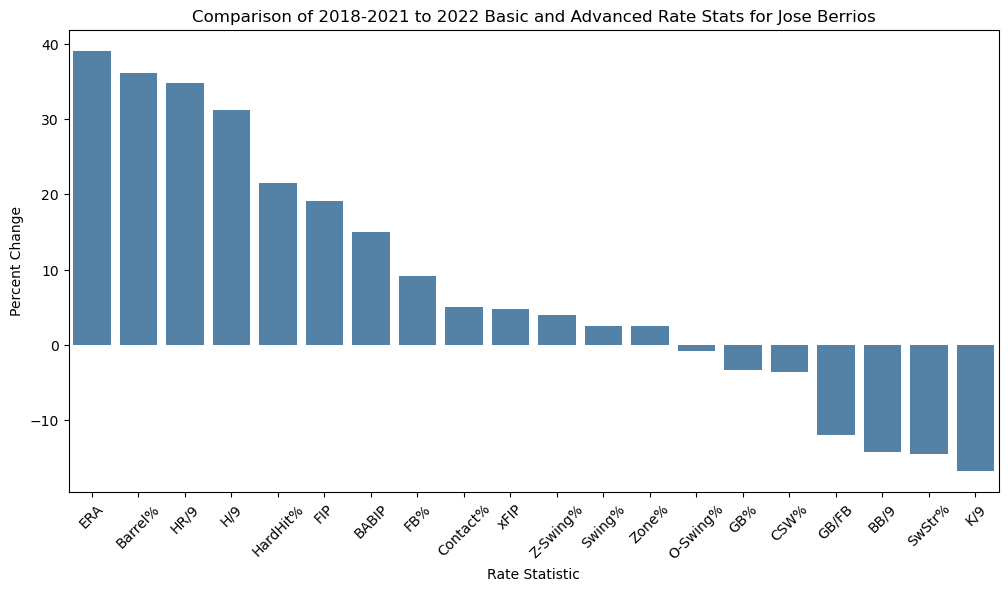

In [13]:
# Plot the differences
fig, ax = plt.subplots(figsize=(12,6))
           
ax=sns.barplot(x=berrios_difference_fg.index, y = berrios_difference_fg, color='steelblue')
plt.title('Comparison of 2018-2021 to 2022 Basic and Advanced Rate Stats for Jose Berrios')
plt.xlabel('Rate Statistic')
plt.xticks(rotation=45)
plt.ylabel('Percent Change')
plt.show()

Note the subtle differences in the magnitudes of the differences in the basic statistics (e.g. ERA, HR/9 and H/9) in the Fangraphs chart due to the missing 2017 data.  Note also the large increases in Barrel% and HardHit% and BABIP.

- Barrel% and HardHit% represent how well the ball was struck by the batter with Barrels representing balls hit "squarely" on the barrel (we'll explain and explore these two statistics in more detail in the Statcast section).  
- Not surprisingly, BABIP or Batting Average for Balls in Play is correspondingly higher in 2022, as balls that are struck harder are more difficult to field and convert into outs.

FIP or [Fielding Independent Pitching](https://www.mlb.com/glossary/advanced-stats/fielding-independent-pitching) is a different measure of pitcher performance:

>"FIP is similar to ERA, but it focuses solely on the events a pitcher has the most control over -- strikeouts, unintentional walks, hit-by-pitches and home runs. It entirely removes results on balls hit into the field of play. For example: If a pitcher has surrendered a high average on balls in play, his FIP will likely be lower than his ERA. Balls in play are not part of the FIP equation because a pitcher is believed to have limited control over their outcome."

Here, the difference between FIP and ERA suggests ~0.7 runs per game due to bad defence for 2022 vs. 2021.  However, Berrios (and his catchers) are still responsible for an additional 1.07 runs per game in 2022 versus 2021.   

The xFIP statistics are also interesting. 

>"Expected Fielding Independent Pitching (xFIP) is a regressed version of Fielding Independent Pitching (FIP), developed by Dave Studeman from The Hardball Times. It’s calculated in the same way as FIP, except it replaces a pitcher’s home run total with an estimate of how many home runs they should have allowed given the number of fly balls they surrendered while assuming a league average home run to fly ball percentage (between 9 and 10% depending on the year)."

Berrios' 2022 xFIP is on par with other years, which is consistent with the interpretation that the increase in HRs is the main driver behind elevated FIP and ERA.

The other interesting difference is the Swinging Strike metric (SwStr%).  It looks like the hitters aren't missing his pitches as much in 2022 when they swing, when compared to all previous seasons.  The relative swing percentages for pitches overall (Swing%), in the strike zone (Z-Swing%) and outside the strike zone (O-Swing%) are not very different from previous seasons, supporting the idea that his ability to throw his pitches for strikes hasn't changed significantly, and it is more of a matter of the hitters getting better contact when they do swing. 

Fangraphs does compile some annualized data on the pitch frequencies and velocities, which can be examined as well to see how they relate to our narrative.

In [14]:
# Isolate the Statcast (sc) average pitch frequencies

fg_pitch_freq =  ['FA% (sc)', 'FT% (sc)',  'FC% (sc)',  'FS% (sc)', 'FO% (sc)',  'SI% (sc)',  'SL% (sc)',  'CU% (sc)',  'KC% (sc)',  'EP% (sc)',  'CH% (sc)',  'SC% (sc)',  'KN% (sc)',  'UN% (sc)']
berrios_pitch_freq = berrios_fg[fg_pitch_freq]
berrios_pitch_freq

,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc)
Season,,,,,,,,,,,,,,
2018,0.344,0.260,NaN,NaN,NaN,NaN,NaN,0.305,NaN,NaN,0.091,NaN,NaN,NaN
2019,0.322,0.231,NaN,NaN,NaN,NaN,NaN,0.289,NaN,NaN,0.159,NaN,NaN,NaN
2020,0.260,NaN,NaN,NaN,NaN,0.255,NaN,0.295,NaN,NaN,0.188,NaN,NaN,NaN
2021,0.267,NaN,NaN,NaN,NaN,0.296,NaN,0.305,NaN,NaN,0.132,NaN,NaN,NaN
2022,0.279,NaN,NaN,NaN,NaN,0.258,NaN,0.309,NaN,NaN,0.154,NaN,NaN,NaN


Generaly, Berrios throws four pitches: a four seam fastball, a two seam fastball/sinker, a curveball and a changeup.

The year-over-year data can be readily visualized to look for differences. 


In [15]:
berrios_pitch_freq.fillna(0, inplace=True)
berrios_pitch_freq['FT/SI'] = berrios_pitch_freq['FT% (sc)']+berrios_pitch_freq['SI% (sc)']
berrios_pitch_freq_edit=berrios_pitch_freq[['FA% (sc)','CU% (sc)','CH% (sc)','FT/SI']]
berrios_pitch_freq_edit

,FA% (sc),CU% (sc),CH% (sc),FT/SI
Season,,,,
2018,0.344,0.305,0.091,0.260
2019,0.322,0.289,0.159,0.231
2020,0.260,0.295,0.188,0.255
2021,0.267,0.305,0.132,0.296
2022,0.279,0.309,0.154,0.258


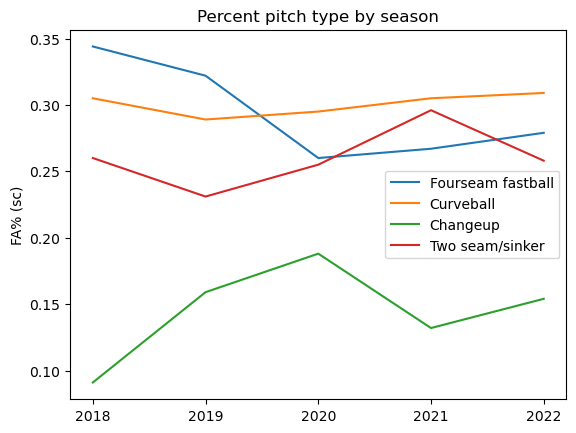

In [16]:
# plot results

years = list(berrios_pitch_freq_edit.index.astype('str'))
years

plt.figure()
sns.lineplot(x=years, y='FA% (sc)', data=berrios_pitch_freq_edit, label='Fourseam fastball')
sns.lineplot(x=years, y='CU% (sc)', data=berrios_pitch_freq_edit, label='Curveball')
sns.lineplot(x=years, y='CH% (sc)', data=berrios_pitch_freq_edit, label='Changeup')
sns.lineplot(x=years, y='FT/SI', data=berrios_pitch_freq_edit, label='Two seam/sinker')
plt.title('Percent pitch type by season')
plt.legend()
plt.show()

Berrios' pitch mix profile for 2022 is not all that different from previous seasons.  In fact, the mix is within the bounds of the mixes from the 2018-2021 seasons where his ERA and FIP were significantly lower. 

What about pitch quality?  The primary metric of quality is velocity followed by location/movement.

In [17]:
# Isolate velocity metrics
fg_pitch_quality_stats = ['vFA (sc)',  'vFT (sc)',  'vFC (sc)',  'vFS (sc)', 'vFO (sc)',  'vSI (sc)',  'vSL (sc)',  'vCU (sc)',  'vKC (sc)',  'vEP (sc)',  'vCH (sc)',  'vSC (sc)',  'vKN (sc)']
berrios_fg_pitch_quality = berrios_fg[fg_pitch_quality_stats]
berrios_fg_pitch_quality

,vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc)
Season,,,,,,,,,,,,,
2018,93.4,92.8,NaN,NaN,NaN,NaN,NaN,81.7,NaN,NaN,83.7,NaN,NaN
2019,93.1,92.1,NaN,NaN,NaN,NaN,NaN,81.2,NaN,NaN,82.5,NaN,NaN
2020,94.5,NaN,NaN,NaN,NaN,94.0,NaN,83.4,NaN,NaN,84.7,NaN,NaN
2021,94.1,NaN,NaN,NaN,NaN,93.8,NaN,82.9,NaN,NaN,84.8,NaN,NaN
2022,94.0,NaN,NaN,NaN,NaN,93.9,NaN,82.9,NaN,NaN,84.6,NaN,NaN


In [18]:
# Clean up output
berrios_fg_pitch_quality.fillna(0, inplace=True)
berrios_fg_pitch_quality['vFT/vSI'] = berrios_fg_pitch_quality['vFT (sc)']+berrios_fg_pitch_quality['vSI (sc)']
berrios_fg_pitch_quality_edit=berrios_fg_pitch_quality[['vFA (sc)','vCU (sc)','vCH (sc)','vFT/vSI']]
berrios_fg_pitch_quality_edit

,vFA (sc),vCU (sc),vCH (sc),vFT/vSI
Season,,,,
2018,93.4,81.7,83.7,92.8
2019,93.1,81.2,82.5,92.1
2020,94.5,83.4,84.7,94.0
2021,94.1,82.9,84.8,93.8
2022,94.0,82.9,84.6,93.9


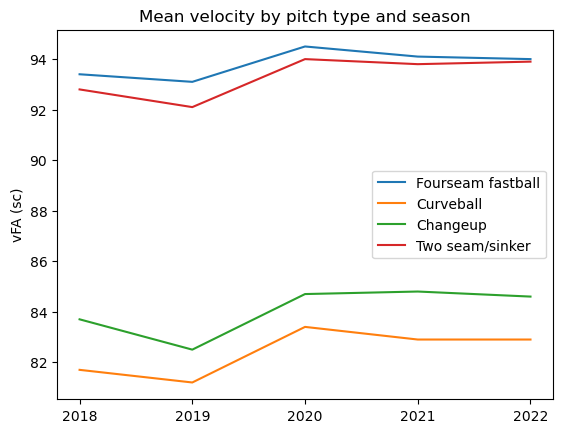

In [19]:
# Plot results

plt.figure()
sns.lineplot(x=years, y='vFA (sc)', data=berrios_fg_pitch_quality_edit, label='Fourseam fastball')
sns.lineplot(x=years, y='vCU (sc)', data=berrios_fg_pitch_quality_edit, label='Curveball')
sns.lineplot(x=years, y='vCH (sc)', data=berrios_fg_pitch_quality_edit, label='Changeup')
sns.lineplot(x=years, y='vFT/vSI', data=berrios_fg_pitch_quality_edit, label='Two seam/sinker')
plt.title('Mean velocity by pitch type and season')
plt.legend()
plt.show()

Berrios has not lost any of his velocity versus previous seasons, supporting the idea that his arm is as healthy and able to pitch as before.  There isn't any smoking gun here as to why hitters are suddenly able to hit him harder in 2022 than before.

We will need to dig deeper by investigating game level data from Statcast.

#### Game Data from Statcast

The Statcast database is an amazing treasure trove of information about each and every pitch and play that occurs in a given season going back to 2006.  The information includes the specifics of each plate appearance including the hitter, pitcher and positional players.  It also includes the physics of what happens to the ball when pitched by the pitcher and caught by the catcher.  It then summarizes the outcome of each pitch and each play in detail.  This level of granularity may provide some more insights into Jose Berrios' 2022 struggles.

Pybaseball has a function that pulls the pitching data for a pitcher over a defined time period.  Note that this can take some time so a .csv version of Berrios data from the beginning of the 2017 seasons through August 2022 is also available.


In [20]:
# Get Berrios MLB id
player = playerid_lookup('berríos', 'josé')
player

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,berríos,josé,621244,berrj001,berrijo01,14168,2016.0,2022.0


In [21]:
# berrios_sc_raw = statcast_pitcher('2017-04-01', '2022-8-31', player_id=player.loc[0,'key_mlbam'])

In [22]:
# berrios_sc_raw.to_csv('berrios_sc_raw.csv', index=False)
# berrios_sc = berrios_sc_raw.copy()

In [23]:
berrios_sc = pd.read_csv('berrios_sc_raw.csv')
berrios_sc

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,CU,2022-08-29,78.1,-3.24,5.36,"Berríos, José",542364,621244,single,hit_into_play,NaN,NaN,NaN,NaN,5.0,Rafael Ortega singles on a fly ball to left fi...,R,L,R,TOR,CHC,X,7.0,fly_ball,2,1,2022,1.47,-0.28,-0.20,2.64,NaN,NaN,614177.0,2,6,Top,76.77,132.43,NaN,NaN,643376,NaN,NaN,3.831782,-113.582022,1.622046,11.805519,23.228408,-35.193943,3.37,1.60,208.0,67.8,41.0,77.6,2242.0,6.2,661801,621244,643376,665489,624415,656305,666182,666971,543807,606132,54.27,0.48,0.478,0.9,1.0,1.0,0.0,3.0,47,4,Curveball,0,2,2,0,2,0,2,0,Infield shift,Standard,44.0,-0.019,0.268
1,CU,2022-08-29,81.6,-3.30,5.43,"Berríos, José",542364,621244,NaN,called_strike,NaN,NaN,NaN,NaN,4.0,Rafael Ortega singles on a fly ball to left fi...,R,L,R,TOR,CHC,S,NaN,NaN,2,0,2022,1.41,-0.21,-0.32,2.38,NaN,NaN,614177.0,2,6,Top,NaN,NaN,NaN,NaN,643376,NaN,NaN,4.000476,-118.792825,0.152362,12.502154,24.238438,-34.437173,3.34,1.57,NaN,NaN,NaN,81.4,2260.0,6.3,661801,621244,643376,665489,624415,656305,666182,666971,543807,606132,54.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,3,Curveball,0,2,2,0,2,0,2,0,Infield shift,Standard,38.0,0.000,-0.057
2,FF,2022-08-29,93.1,-3.11,5.52,"Berríos, José",542364,621244,NaN,ball,NaN,NaN,NaN,NaN,11.0,Rafael Ortega singles on a fly ball to left fi...,R,L,R,TOR,CHC,B,NaN,NaN,1,0,2022,-0.70,1.19,-0.61,3.43,NaN,NaN,614177.0,2,6,Top,NaN,NaN,NaN,NaN,643376,NaN,NaN,7.959351,-135.300229,-2.155810,-10.426396,30.864435,-17.350857,3.20,1.57,NaN,NaN,NaN,92.7,2221.0,6.2,661801,621244,643376,665489,624415,656305,666182,666971,543807,606132,54.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,2,4-Seam Fastball,0,2,2,0,2,0,2,0,Infield shift,Standard,230.0,0.000,0.044
3,CH,2022-08-29,84.5,-3.25,5.20,"Berríos, José",542364,621244,NaN,blocked_ball,NaN,NaN,NaN,NaN,13.0,Rafael Ortega singles on a fly ball to left fi...,R,L,R,TOR,CHC,B,NaN,NaN,0,0,2022,-1.03,-0.09,-0.44,0.52,NaN,NaN,614177.0,2,6,Top,NaN,NaN,NaN,NaN,643376,NaN,NaN,8.565390,-122.762454,-4.297563,-12.139178,25.629892,-32.345998,3.42,1.62,NaN,NaN,NaN,84.1,1484.0,6.2,661801,621244,643376,665489,624415,656305,666182,666971,543807,606132,54.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,1,Changeup,0,2,2,0,2,0,2,0,Infield shift,Standard,258.0,0.000,0.032
4,CU,2022-08-29,84.0,-3.23,5.36,"Berríos, José",663538,621244,field_out,hit_into_play,NaN,NaN,NaN,NaN,9.0,Nico Hoerner pops out to second baseman Cavan ...,R,R,R,TOR,CHC,X,4.0,popup,2,2,2022,0.96,-0.17,0.44,1.61,NaN,NaN,614177.0,1,6,Top,132.29,127.86,NaN,NaN,643376,NaN,NaN,6.587114,-122.185077,-1.890817,8.129651,26.304111,-33.648764,3.25,1.55,182.0,66.6,50.0,83.6,2297.0,6.3,661801,621244,643376,665489,624415,656305,666182,666971,543807,606132,54.23,0.14,0.126,0.0,1.0,0.0,0.0,3.0,46,6,Curveball,0,2,2,0,2,0,2,0,Standard,Standard,33.0,0.020,-0.271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Some data processing is required, starting with converting the ball and strike counts to a pitch count and converting dates into the correct format.

In [24]:
# Convert balls and strikes to pitch count
berrios_sc[['balls','strikes']].head(5)

berrios_sc['pitch_count'] = berrios_sc['balls'].astype(str) + "-" + berrios_sc['strikes'].astype(str)
berrios_sc.drop(['balls','strikes'], axis=1, inplace=True)

# Check results
pd.crosstab(berrios_sc['game_year'], berrios_sc['pitch_count'],normalize='columns')

pitch_count,0-0,0-1,0-2,1-0,1-1,1-2,2-0,2-1,2-2,3-0,3-1,3-2
game_year,,,,,,,,,,,,
2017,0.147216,0.140731,0.122807,0.174207,0.172733,0.146407,0.175803,0.162698,0.155812,0.233533,0.190789,0.167683
2018,0.204053,0.209292,0.194577,0.197839,0.193911,0.190060,0.213611,0.215608,0.220940,0.233533,0.190789,0.204268
2019,0.220592,0.215156,0.219298,0.212019,0.205824,0.227670,0.196597,0.203704,0.192086,0.203593,0.210526,0.190549
2020,0.076636,0.072170,0.074960,0.076300,0.080741,0.075890,0.079395,0.084656,0.092333,0.065868,0.072368,0.097561
2021,0.200326,0.203879,0.212919,0.197839,0.203177,0.213566,0.217391,0.210317,0.208574,0.173653,0.220395,0.211890
2022,0.151176,0.158773,0.175439,0.141796,0.143614,0.146407,0.117202,0.123016,0.130256,0.089820,0.115132,0.128049


In [25]:
# Change date type
berrios_sc['game_date']= pd.to_datetime(berrios_sc['game_date'], format="%Y/%m/%d")

Also, we want to add some of the distinct features from the previous analysis relating to how hard the ball was struck: HardContact and Barrels. These metrics are based on the launch speed and launch angle of the ball when hit and are stored as categorical values in the launch_speed_angle column:  If the value is 4 or higher, the contact was "Hard" and therefore difficult for the opposite team to field and turn into an out.  If the value is 6, the contact is a ["Barrel"](https://www.mlb.com/glossary/statcast/barrel) that is hit very hard (launch speed greater than 98 mph). The launch angle for a Barrel depends on the speed, with higher velocities having expanded angle ranges. Barrels with launch angles between 25 and 35 degrees and velocities over 100 mph have a high probability of turning into [homeruns](https://baseballsavant.mlb.com/statcast_field?ev=103&la=32).

In [26]:
# Add HardContact and Barrels as features as well for target variable modeling later
berrios_sc['HardContact'] = berrios_sc['launch_speed_angle'].map(lambda x: 1 if x > 4 else 0).dropna()
berrios_sc['Barrels'] = berrios_sc['launch_speed_angle'].map(lambda x: 1 if x ==6 else 0).dropna()

In [27]:
### Create subsets based on these three outcomes
#Subset on Barrels
berrios_barrels = berrios_sc[berrios_sc['Barrels']==1]

#Subset on HardContact
berrios_hardcontact = berrios_sc[berrios_sc['HardContact']==1]

# Subset on homeruns
berrios_homeruns = berrios_sc[berrios_sc['events']=='home_run']


In [28]:
def season_boxplot(df, column, title =''):
    """ A function to plot boxplots of a dataframe column with custom title
    """
    plt.figure(figsize=(12,6))
    sns.boxplot(x='game_year', y= column, data = df)
    plt.title(f'{title}')
    plt.show()
    
    return

With pitch-by-pitch data we can take another look at the pitch quality metrics using population distributions rather than simple mean values.

In [29]:
# Subset the data by pitch type
pitches = berrios_sc['pitch_type'].value_counts()
pitches

FF    4674
CU    4626
SI    4082
CH    1960
CS      27
PO       2
SL       1
Name: pitch_type, dtype: int64

Statcast has classified a handful (30) of additional pitch types for Berrios beyond the four recognized by Fangraphs. These are not significant relative to the other 15,000 pitches he has thrown and can be dropped.

In [30]:
# Delete infrequent pitches
pitches.drop(['CS','PO','SL'], axis=0, inplace=True)
pitches

FF    4674
CU    4626
SI    4082
CH    1960
Name: pitch_type, dtype: int64

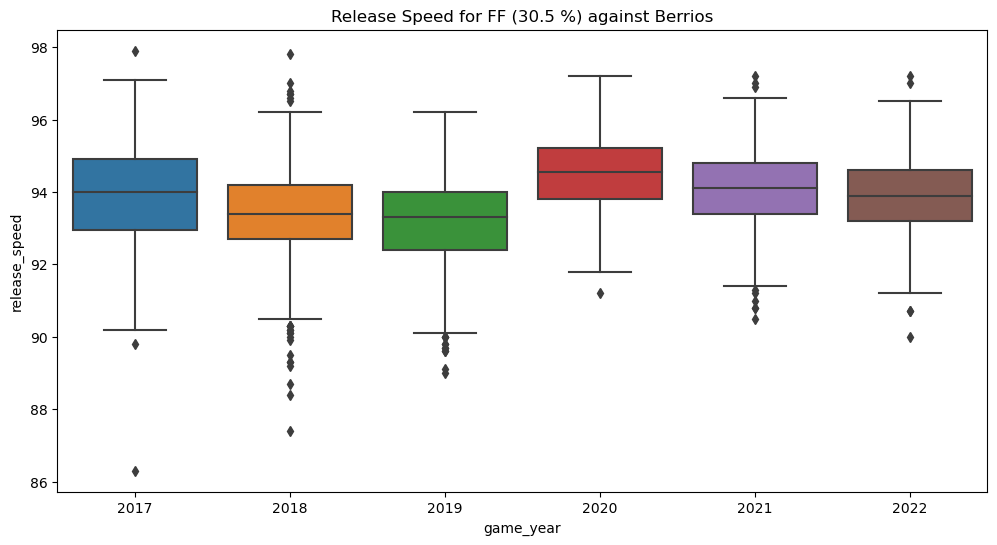

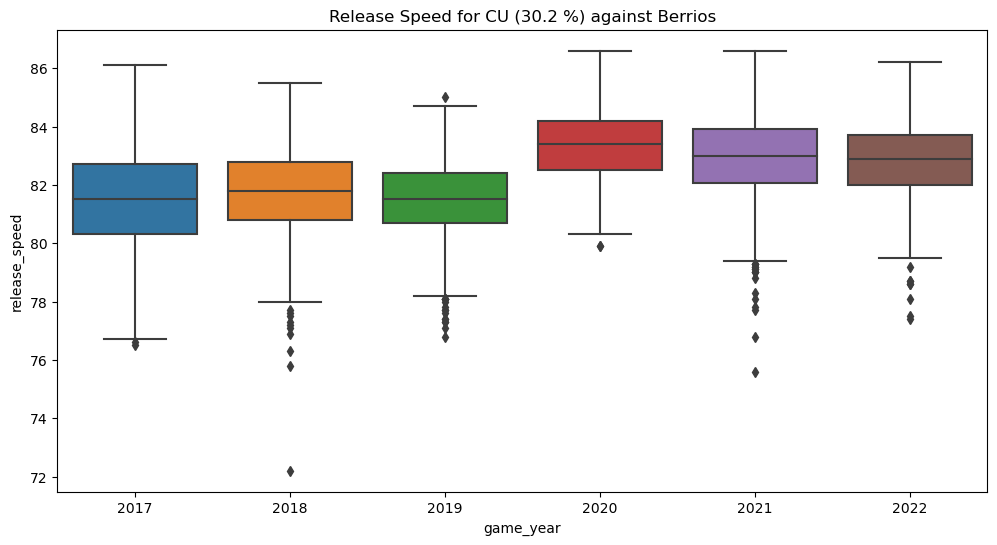

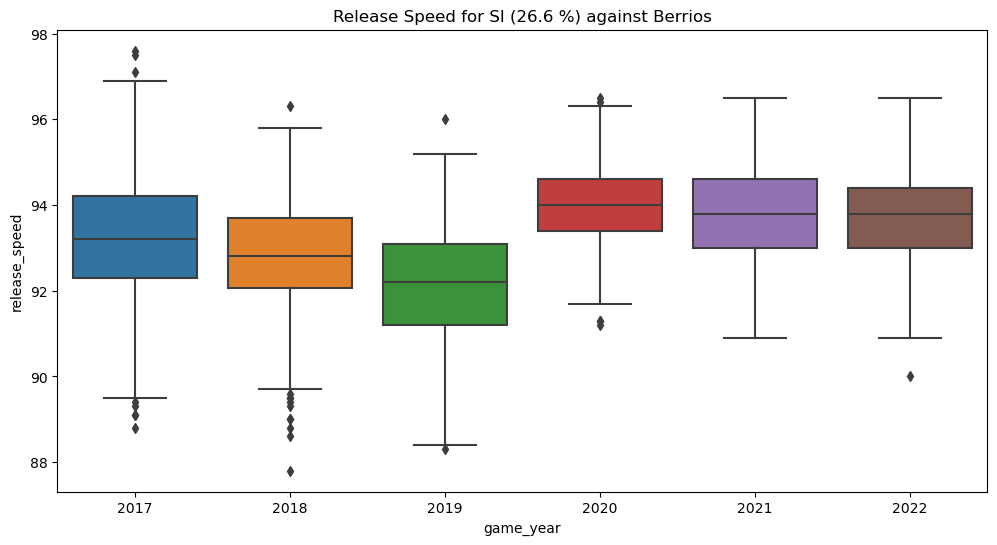

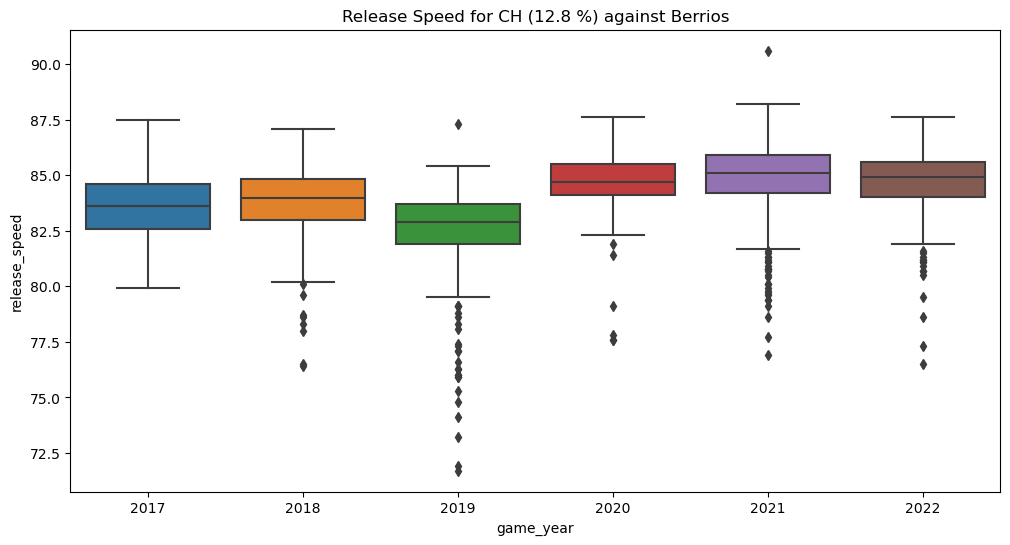

In [31]:
# Create box plot for each pitch
for pitch in pitches.index:
    count = pitches[pitch].sum()
    total = pitches.sum()
    frequency = round(count/total*100,1)
    title = f'Release Speed for {pitch} ({frequency} %) against Berrios'
    dataframe = berrios_sc[berrios_sc['pitch_type']==pitch]
    season_boxplot(dataframe, 'release_speed', title=title)

As before, there is nothing obvious in pitch speed distributions for 2022 versus previous years, suggesting that Berrios's arm is still healthy.

We can take another look at the pitch frequencies year over year (y-o-y) as well.  Previously, we showed that the 2022 frequencies for his four pitches were in range of the other seasons.  But, is there a difference in the percentage of each pitch that is hit hard?  To answer this question, we can calculate the frequencies of each pitch for all pitches, then the frequencies of each pitch for the hardcontact instances and compare the 

In [32]:
seasons = berrios_hardcontact['game_year'].unique()

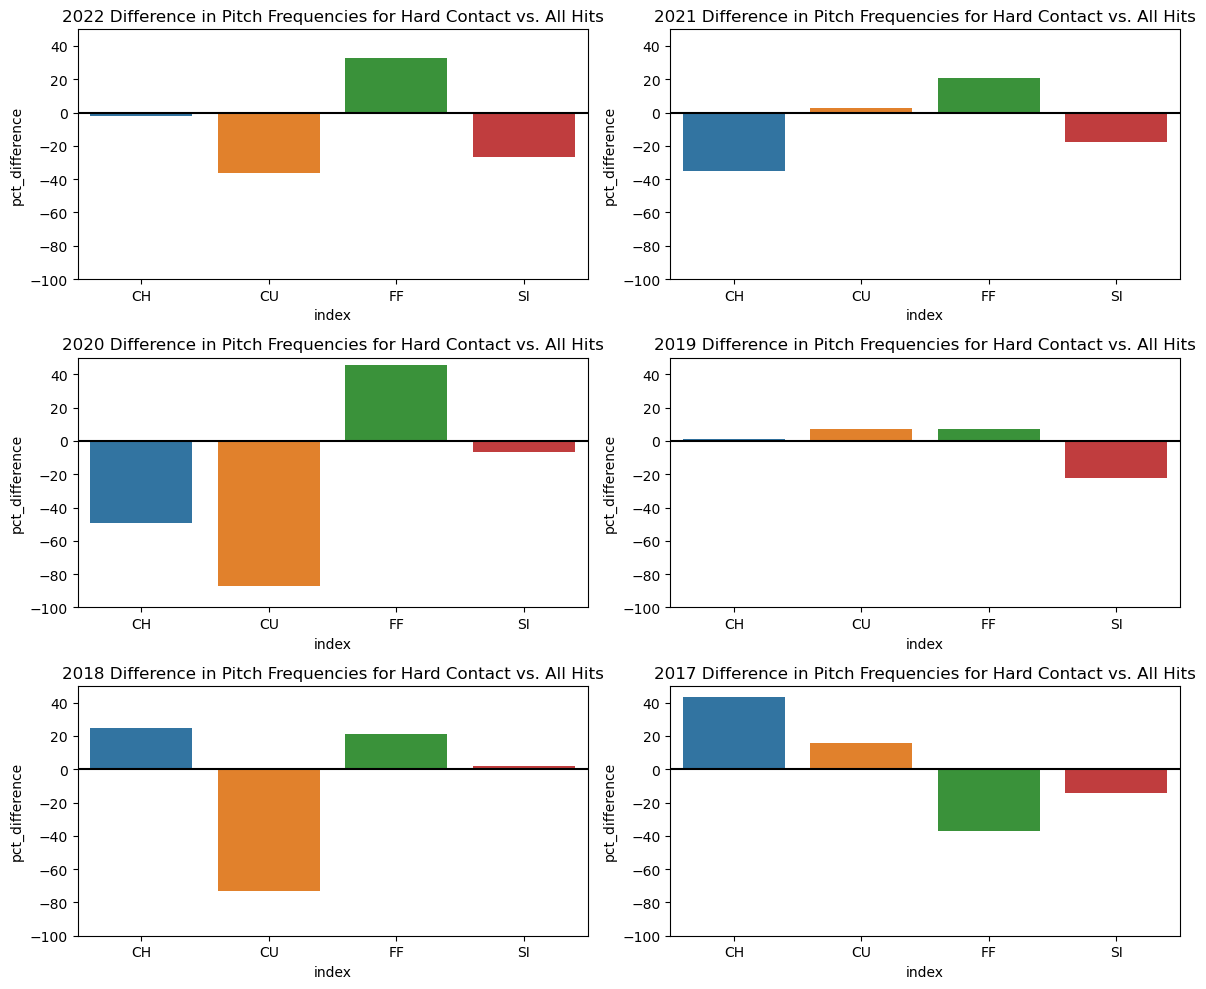

In [33]:
# Create subplots
rows = 3
cols = 2
figsize = (12,10)
plot_count = 1
hue_order = ['FF','SI','CU','CH']
fig, ax = plt.subplots(rows, cols, figsize=figsize)

# Calculate the differences in frequencies
for season in seasons:
    pitch_freq = berrios_sc[berrios_sc['game_year']==season]['pitch_type'].value_counts(normalize=True)
    pitch_hardcontact = berrios_hardcontact[berrios_hardcontact['game_year']==season]['pitch_type'].value_counts(normalize=True)
    freq_difference = pd.merge(pitch_freq, pitch_hardcontact, left_index=True, right_index=True, suffixes = ['_total','_hardcontact']).reset_index()
    freq_difference['pct_difference']= round((freq_difference['pitch_type_hardcontact']-
                                      freq_difference['pitch_type_total'])/freq_difference['pitch_type_hardcontact']*100,2)
    
    freq_difference.sort_values(by='index', inplace=True)
    freq_difference.set_index('index', inplace=True)
    
    # Plot the results
    ax = plt.subplot(rows, cols, plot_count)
    ax = sns.barplot(x=freq_difference.index, y='pct_difference', data=freq_difference)

    ax.set_title(f"{season} Difference in Pitch Frequencies for Hard Contact vs. All Hits")
    ax.set_ylim(-100,50)
    plt.axhline(0, label = 'mode', color = 'black')
    plot_count += 1

plt.tight_layout()
plt.show()


The graph shows that Berrios's fourseam fastball was the hardest hit pitch, while his curveball was the lowest.  Interestly, the graph also shows that the 4 seamer has been his hardest hit pitch now for the past three years, while his slider and curveball are not generally hit hard in comparison.  

Finally, we can take a look at pitch count to see if there any noticeable differences over the seasons.


In [40]:
def plot_aggregate_data(df, column, title='', colormap='tab20c'):
    new_df = df.groupby('game_year')[column].value_counts(normalize=True).dropna()
    new_df.unstack().plot(kind='bar', stacked=True, figsize=(12,6), colormap=colormap)
    plt.title(title)
    plt.legend(loc='center')
    plt.show()
    
    display(new_df.unstack().round(2))

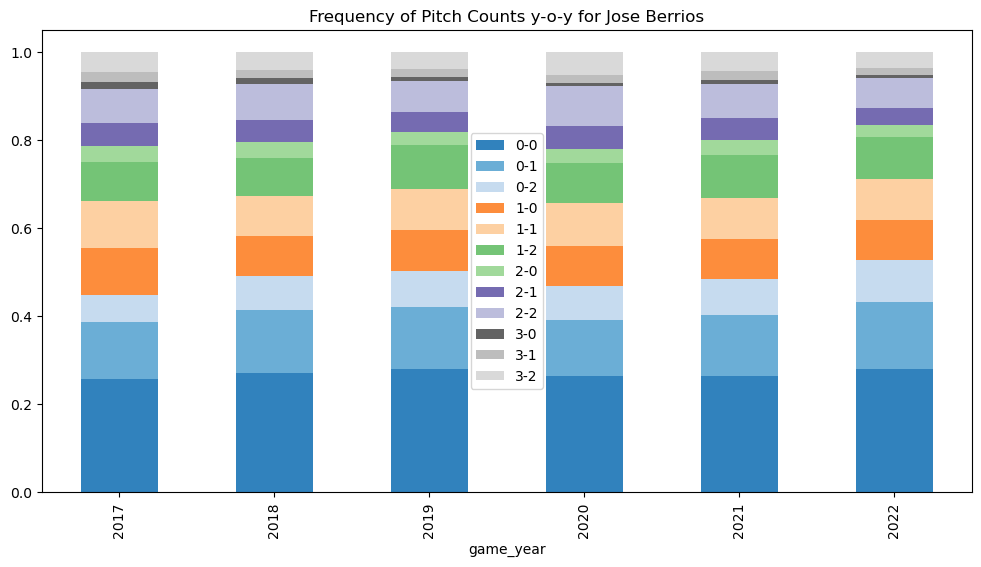

pitch_count,0-0,0-1,0-2,1-0,1-1,1-2,2-0,2-1,2-2,3-0,3-1,3-2
game_year,,,,,,,,,,,,
2017,0.26,0.13,0.06,0.11,0.11,0.09,0.04,0.05,0.08,0.02,0.02,0.04
2018,0.27,0.14,0.08,0.09,0.09,0.09,0.04,0.05,0.08,0.01,0.02,0.04
2019,0.28,0.14,0.08,0.09,0.09,0.10,0.03,0.05,0.07,0.01,0.02,0.04
2020,0.26,0.13,0.08,0.09,0.10,0.09,0.03,0.05,0.09,0.01,0.02,0.05
2021,0.26,0.14,0.08,0.09,0.09,0.10,0.04,0.05,0.08,0.01,0.02,0.04
2022,0.28,0.15,0.10,0.09,0.09,0.09,0.03,0.04,0.07,0.01,0.02,0.04


In [41]:
title = 'Frequency of Pitch Counts y-o-y for Jose Berrios'
plot_aggregate_data(berrios_sc, 'pitch_count', title=title)

THere are no obvious differences between seasons for the frequencies of each count over the 2017 to 2022 seasons, consistent with the idea that the quality of his pitches hasn't changed very much.  

For HardContact though, we do see some differences between the seasons, with there being almost half of the Hard hits in the 0-0, 0-1 and 0-2 counts for 2022 and for 2019 and 2020.  

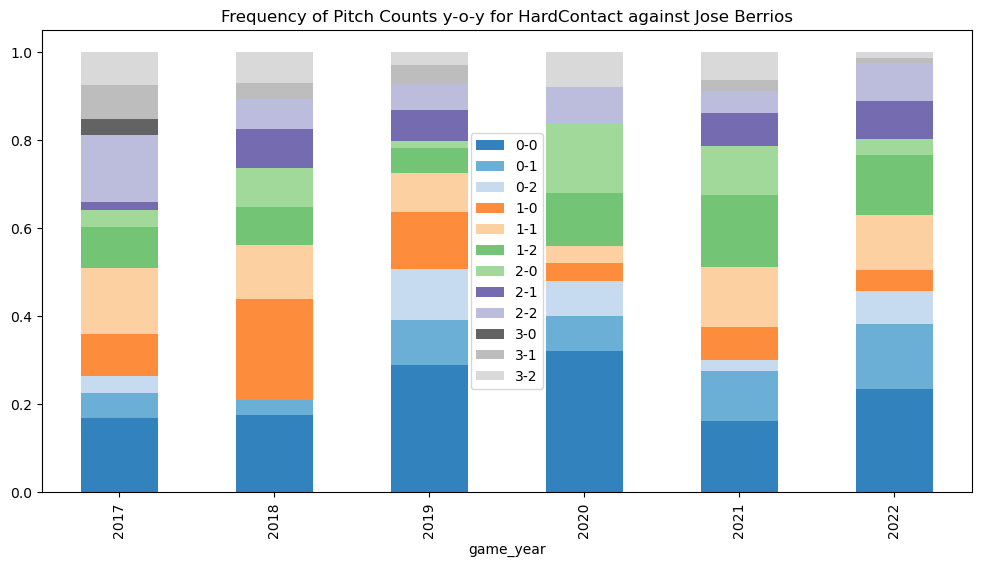

pitch_count,0-0,0-1,0-2,1-0,1-1,1-2,2-0,2-1,2-2,3-0,3-1,3-2
game_year,,,,,,,,,,,,
2017,0.17,0.06,0.04,0.09,0.15,0.09,0.04,0.02,0.15,0.04,0.08,0.08
2018,0.18,0.04,NaN,0.23,0.12,0.09,0.09,0.09,0.07,NaN,0.04,0.07
2019,0.29,0.10,0.12,0.13,0.09,0.06,0.01,0.07,0.06,NaN,0.04,0.03
2020,0.32,0.08,0.08,0.04,0.04,0.12,0.16,NaN,0.08,NaN,NaN,0.08
2021,0.16,0.11,0.02,0.08,0.14,0.16,0.11,0.08,0.05,NaN,0.02,0.06
2022,0.23,0.15,0.07,0.05,0.12,0.14,0.04,0.09,0.09,NaN,0.01,0.01


In [42]:
title = 'Frequency of Pitch Counts y-o-y for Hard Contact against Jose Berrios'
plot_aggregate_data(berrios_hardcontact, 'pitch_count', title=title)


Notably, there are very few Hardcontacts late in the count (3-1, 3-2) in 2022 when compared to other seasons.  This is consistent with the idea that some of the hitters are jumping on his pitches earlier in the counts.  In contrast, in 2017, when he was just up from the minor leagues and struggling, almost 20% of his Hard hits were in these late ball counts.    


#### Pitch Movement Physics

Statcast also allows us to explore the physics of each pitch, from the release point out of the pitcher's hand right through to the catcher's glove.  One of the more interesting concepts in baseball is that the hitters, professionals that they are, can sometimes pick up on which type of pitch the pitcher is going to throw, so-called "tipping" of pitches. This typically is due to some mechanical differences in the way each pitch is thrown, although there are instances of where the hitters know what is coming from illegal means as well (for example, the Astros infamous [trashcan sign stealing scandal](https://en.wikipedia.org/wiki/Houston_Astros_sign_stealing_scandal) of 2017-2018).

Let's take a look at the release coordinates for Berrios's pitches over the 2017 to 2022 seasons.


In [43]:
# Subset pitch types
pitches = ['FF','SI','CU','CH']
berrios_sc = berrios_sc[berrios_sc['pitch_type'].isin(pitches)]

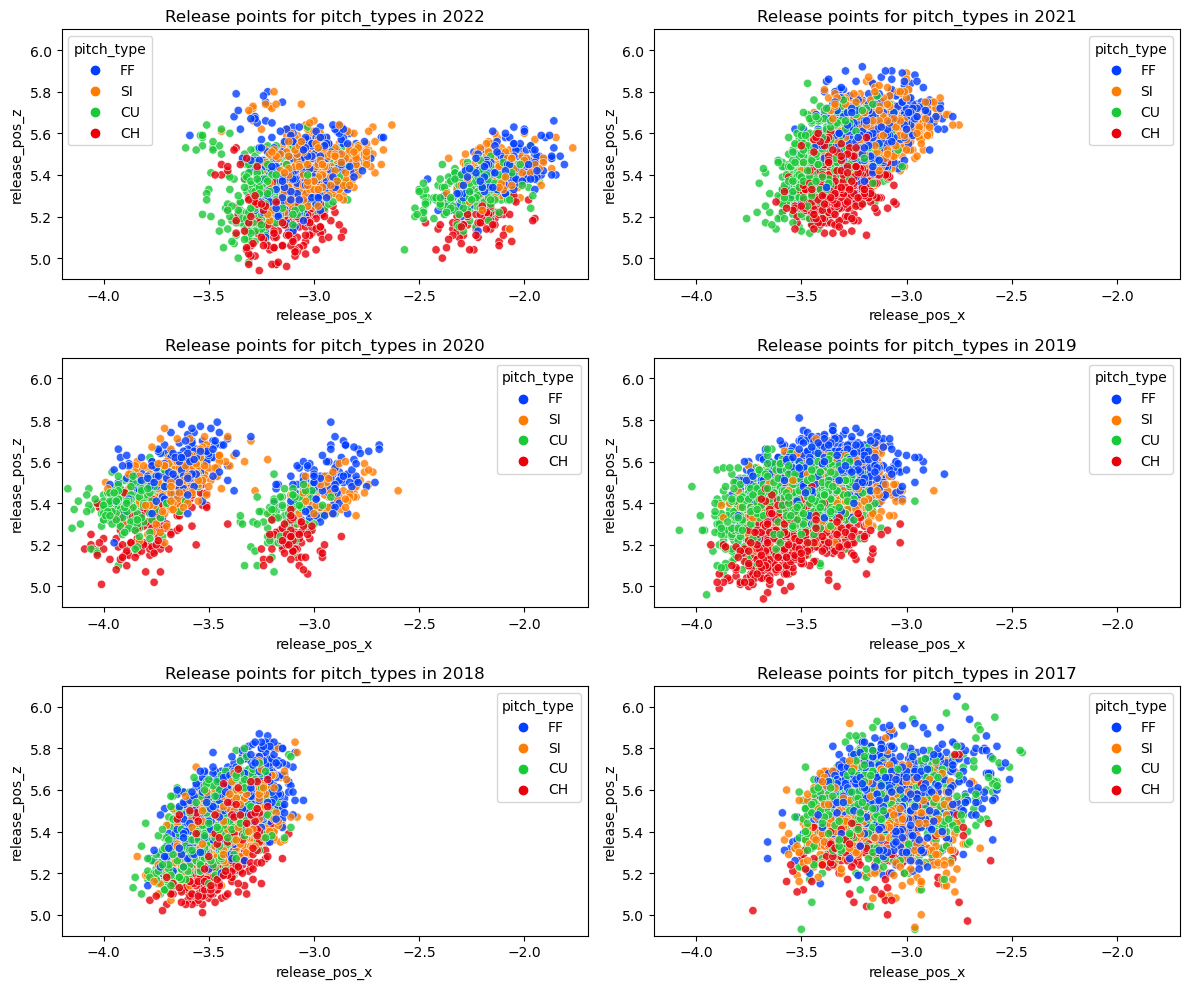

In [44]:
# Plot results
rows = 3
cols = 2
figsize = (12,10)
plot_count = 1
hue_order = ['FF','SI','CU','CH']
fig, ax = plt.subplots(rows, cols, figsize=figsize)

for season in seasons:
    season_df = berrios_sc.loc[berrios_sc['game_year']==season]
    ax = plt.subplot(rows, cols, plot_count)
    ax = sns.scatterplot(x='release_pos_x', y ='release_pos_z', data = season_df, hue='pitch_type', hue_order=hue_order,
                         alpha=0.8, palette='bright') #x_jitter=True, y_jitter=True,
    ax.set_title(f'Release points for pitch_types in {season}')
    ax.set_xlim(-4.2,-1.7)
    ax.set_ylim(4.9,6.1)

    plot_count +=1
    
plt.tight_layout()
plt.show()   
 

There are some interesting features in the charts

- there are two different release positions for 2022, and for 2020:  this means that Berrios was setting up on different parts of the rubber during the year.
- the pitch type data is quite scattered in 2017 with a good mix of the pitches
- there appears to be some segregation in the pitches, especially his changeup, in 2019 onwards, when compared to 2018 and 2017.  

We can get a better understand of segregation by plotting each pitch type on its own against a background of the other pitches, focusing on the 2022 data.

In [45]:
data_2022 = berrios_sc.loc[berrios_sc['game_year']>2021,:].dropna(subset=['release_pos_x','release_pos_z'])

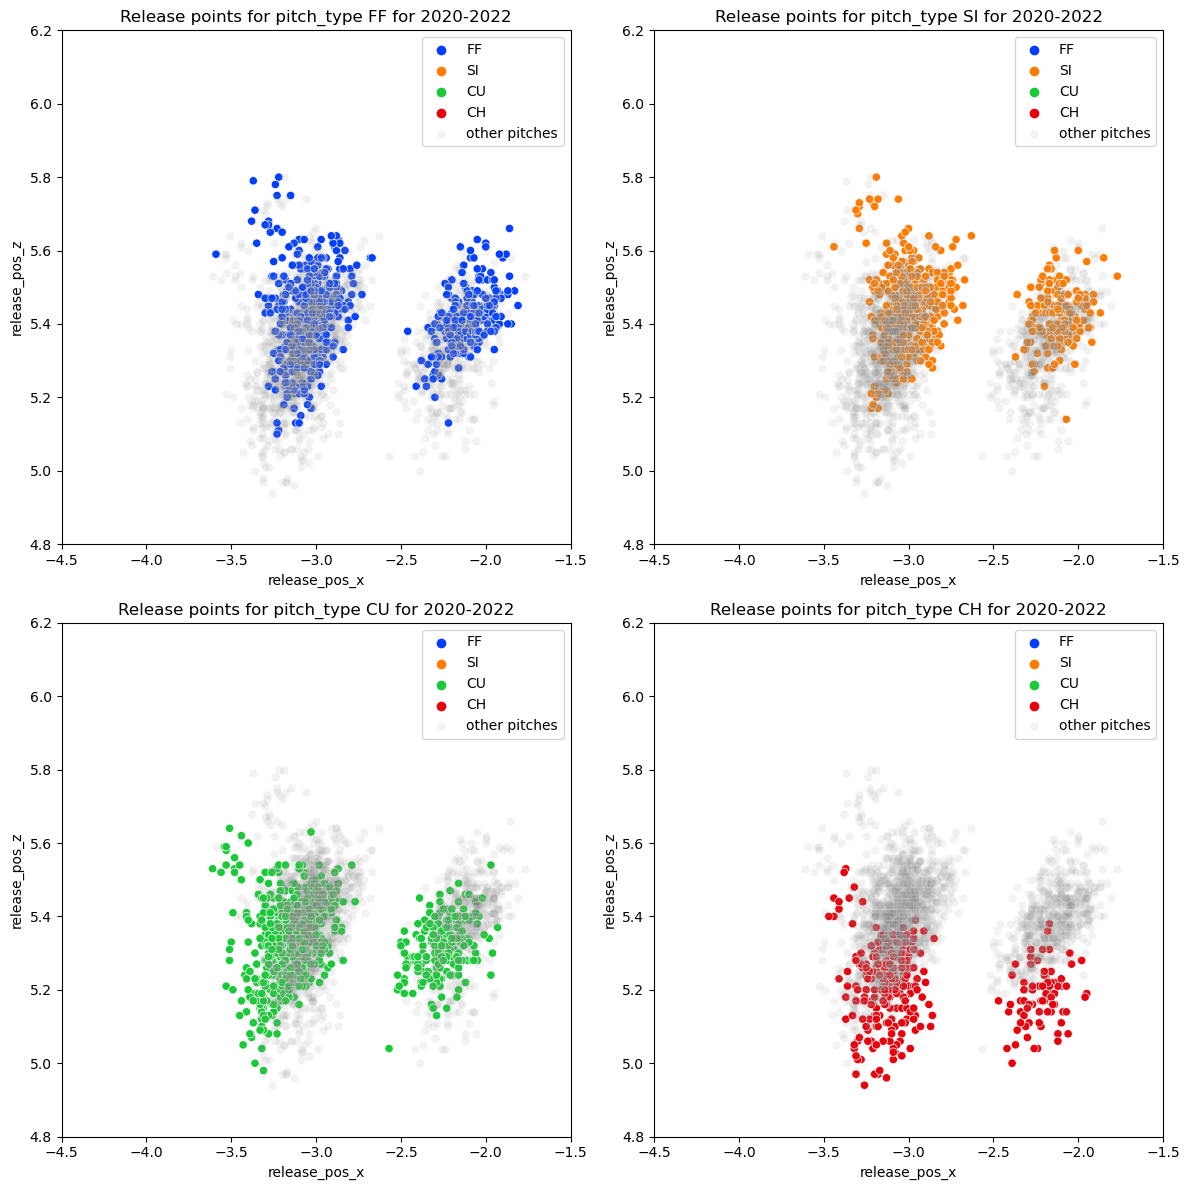

In [46]:
rows = 2
cols = 2
figsize = (12,12)
plot_count = 1
hue_order = ['FF','SI','CU','CH']
fig, ax = plt.subplots(rows, cols, figsize=figsize)

for pitch in pitches:
    pitch_df = data_2022.loc[data_2022['pitch_type']==pitch,:]
    other_df = data_2022.loc[data_2022['pitch_type']!=pitch,:]
    ax = plt.subplot(rows, cols, plot_count)
    ax = sns.scatterplot(x='release_pos_x', y ='release_pos_z', data = pitch_df, hue='pitch_type', 
                         hue_order=hue_order, alpha=1, sizes=1, palette='bright')
    ax = sns.scatterplot(x='release_pos_x', y ='release_pos_z', data = other_df, alpha=0.1, sizes=1, color='grey', label='other pitches',)
    ax.set_title(f'Release points for pitch_type {pitch} for 2020-2022')
    ax.set_xlim(-4.5,-1.5)
    ax.set_ylim(4.8,6.2)
    plot_count +=1
    
plt.tight_layout()
plt.show()   

In this view, it does look like there is a core area where all pitches are delivered from, but there is still some segregation for each pitch type, especially when looking at the changeup location data (lower vertical position) vs. his harder fastball/slider pitches.  The curveball map also looks to be somewhat separated from the harder pitches, coming from the lower left quadrant versus the upper right. 

We can take this one step further by overlaying the HardContact instances. 

In [47]:
data_2022.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'game_year', 'pfx_x', 'pfx_z', 'plate_x',
       'plate_z', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning',
       'inning_topbot', 'hc_x', 'hc_y', 'tfs_deprecated',
       'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id', 'vx0', 'vy0',
       'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'hit_distance_sc',
       'launch_speed', 'launch_angle', 'effective_speed', 'release_spin_rate',
       'release_extension', 'game_pk', 'pitcher.1', 'fielder_2.1', 'fielder_3',
       'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8',
       'fielder_9', 'release_pos_y', 'estimated_ba_using_speedangle',
 

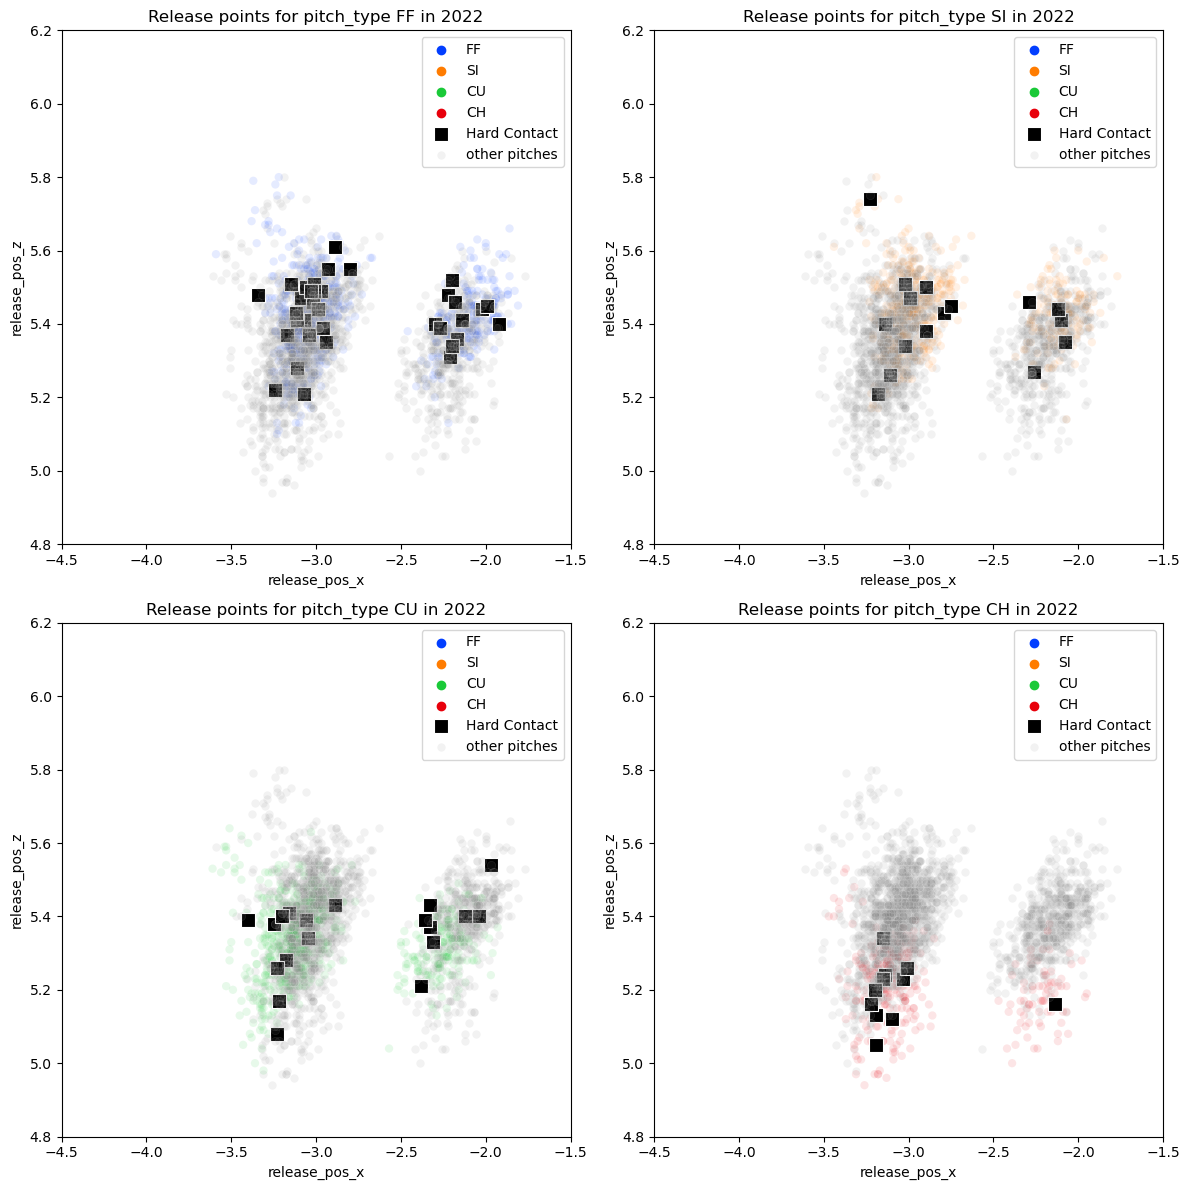

In [48]:
rows = 2
cols = 2
figsize = (12,12)
plot_count = 1
hue_order = ['FF','SI','CU','CH']
fig, ax = plt.subplots(rows, cols, figsize=figsize)

for pitch in pitches:
    pitch_df = data_2022.loc[data_2022['pitch_type']==pitch,:]
    other_df = data_2022.loc[data_2022['pitch_type']!=pitch,:]
    ax = plt.subplot(rows, cols, plot_count)
    ax = sns.scatterplot(x='release_pos_x', y ='release_pos_z', data = pitch_df, hue='pitch_type',
                         hue_order=hue_order, alpha=.1, sizes=1, palette='bright')
    ax = sns.scatterplot(x='release_pos_x', y ='release_pos_z', data = pitch_df.loc[pitch_df['HardContact']==1], color='black', marker='s',
                         hue_order=hue_order, alpha=1, s=100,palette='bright', label='Hard Contact')
    ax = sns.scatterplot(x='release_pos_x', y ='release_pos_z', data = other_df, alpha=0.1, sizes=1, color='grey', label='other pitches',)
    ax.set_title(f'Release points for pitch_type {pitch} in 2022')
    ax.set_xlim(-4.5,-1.5)
    ax.set_ylim(4.8,6.2)
    plot_count +=1
    
plt.tight_layout()
plt.show()   

For each pitch type, the Hard hits seem to span the full range, rather than be outliers on the edge of the clustering.  So, pitch release point location doesn't fully explain the increase in Hard hits for his fourseam fastball or his other pitches. 

Having said that, this does not rule out the possibility that there is at least some information being gleaned about what is coming based on the release position of Berrios's hand just prior to the pitch.  If hitters can pick up on his changeup out of his hand, and perhaps distinguish his curveball as well, then they know that the pitch is most likely a fastball and can get ready to hit it Hard, perhaps earlier in the counts than before.  To prove this out, video data would need to be matched up with the Statcast data to look for further evidence that the some of the hitters seem to know what is coming.

### Conclusion

Jose Berrios had a year to forget in 2022 from a statistics point of view, going from having an ace-like profile to the starting pitcher with the worst ERA by mid-August.  By walking through basic and advanced statistical data from Baseball Reference, Fangraphs and Statcast we have seen the aforementioned large increase in his ERA be matched by a significant increase in homeruns, Hard Contact rate and in Fielding independent pitching, as well as decreases in walks per 9, strikeouts per 9 and swinging strike rates.  Hitters were swinging at about the same frequency as in previous seasons but were generally hitting the ball more and harder than in the past even though the velocities of the pitches or the frequency at which they are being thrown hasn't really changed.  From a pitch point of view, it seems like his fourseam fastball was being hit harder in particular.

It also become evident that some of the patterns in his pitch-by-pitch data are not new: his mechanics have been in flux more than just 2022, and his fourseam fastball has been hit harder than his other pitches for the past three seasons.  Analysing the Hard hit rate for different ball counts suggests that hitters are "getting the jump" and hitting the ball hard earlier in the plate appearance compared to before, while visual inspection of his pitches by release point shows that there is some segregation in his pitches, with his change up in particular coming out of his hand lower than all of the other pitches.  While not a smoking gun, it is possible that Berrios is tipping his pitches to some degree via his release point and that some hitters are taking advantage.

Why this has manifested in a sudden increase in Hard hits, FIP and ERA may have nothing to do with Berrios per se:  there have been some amazing [technology advances](https://www.youtube.com/watch?v=gt1fs_9xs40) in past year or so that allow hitters to use the Statcast data themselves to practice pitch recognition and batting against the very same pitchers that they will face in the game situation.  Maybe the reason for Berrios's "sudden" struggles is that the hitters are just more prepared now to a) spot the differences in his pitch release points and b) learn his pitch trajectories for those pitches.  Combined together, hitters may simple be more prepared as of 2022 to use historical information to hit Berrios's pitches and hit them hard. 

If this is the case, then changing his pitch types, the shape and trajectory of his pitches (possibly why he moved over on the rubber for a while), and his pitch sequence strategies may be ways to obfuscate his historical Statcast data and regain some of his previous glory as a top line starting pitcher for the Toronto Blue Jays.